In [43]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Prepare Data
데이터를 로드하고 nomalize한다

-> dataset의 shape를 맞춤

In [44]:
# Model / data.parameters
num_classes = 10
input_shape = (28,28,1)

#the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Scale images to the [0, 1] range
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

# Make sure images have shape(28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Explore Data

숫자 데이터를 직접 출력해보기

Image shape:  (28, 28, 1)
Image Label Array: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Image label shape: (10,) 
Image Label: 5


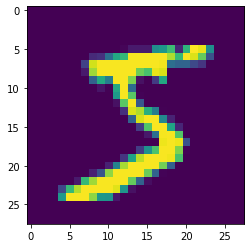

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

img_id = 0
print ('Image shape: ', x_train[img_id].shape)
print ('Image Label Array:', y_train[img_id],
"Image label shape:", y_train[img_id].shape,
"\nImage Label:" , np.argmax(y_train[img_id]))
plt.imshow(x_train[img_id].reshape(28, 28), interpolation='nearest')
plt.show()

데이터 셋에 저장되어있는 데이터 셋을 한번 출력해봄

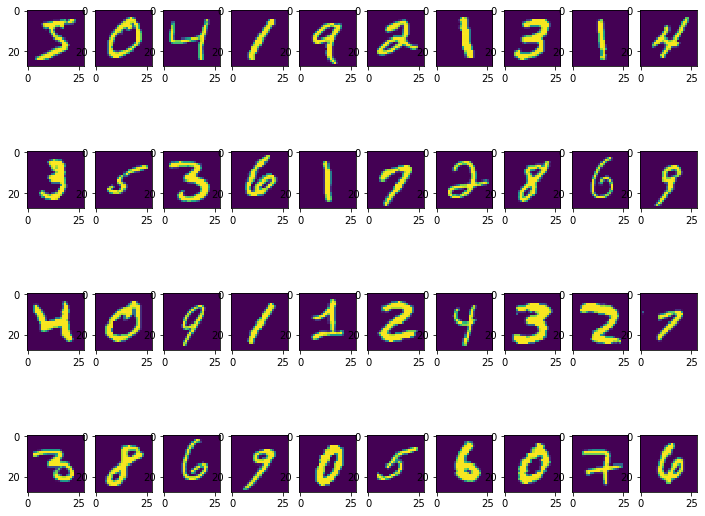

In [46]:
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range (40) :
  plt.subplot(y, x, i+1)
  plt.imshow(x_train[i].reshape((28,28)), interpolation='nearest')
plt. show()

# Make model
주어진 구조로 모델을 설계한다

이러한 구조를 keras의 sequential을 이용해서 쉽게 할 수 있다고 한다.

In [47]:
model = keras.Sequential(
  [
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout (0.5),
    layers.Dense (num_classes, activation="softmax"),
  ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

# Set Training Parameter & Train

m1pro칩을 이용해보고 싶어서 로컬에 tensorflow 설치를 해봄..ㅎ

apple silicon에서는 설치법이 달라서 고생했지만 조교님이 사용하신 코랩 gpu와 비슷한 성능이 나와서 조금 실망함.

In [48]:
batch_size = 128
epochs = 16
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/16
  9/422 [..............................] - ETA: 6s - loss: 2.2322 - accuracy: 0.1901

2022-05-26 22:22:06.739792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


419/422 [============================>.] - ETA: 0s - loss: 0.3566 - accuracy: 0.8925

2022-05-26 22:22:10.801895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 4s 10ms/step - loss: 0.3551 - accuracy: 0.8929 - val_loss: 0.0905 - val_accuracy: 0.9755
Epoch 2/16
422/422 [==============================] - 4s 10ms/step - loss: 0.1081 - accuracy: 0.9669 - val_loss: 0.0584 - val_accuracy: 0.9852
Epoch 3/16
422/422 [==============================] - 4s 10ms/step - loss: 0.0808 - accuracy: 0.9752 - val_loss: 0.0463 - val_accuracy: 0.9867
Epoch 4/16
422/422 [==============================] - 4s 10ms/step - loss: 0.0673 - accuracy: 0.9794 - val_loss: 0.0415 - val_accuracy: 0.9872
Epoch 5/16
422/422 [==============================] - 4s 10ms/step - loss: 0.0604 - accuracy: 0.9815 - val_loss: 0.0394 - val_accuracy: 0.9883
Epoch 6/16
422/422 [==============================] - 4s 10ms/step - loss: 0.0539 - accuracy: 0.9836 - val_loss: 0.0376 - val_accuracy: 0.9893
Epoch 7/16
422/422 [==============================] - 4s 10ms/step - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0354 - val_accuracy: 0.9907
Epoch 8/16

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


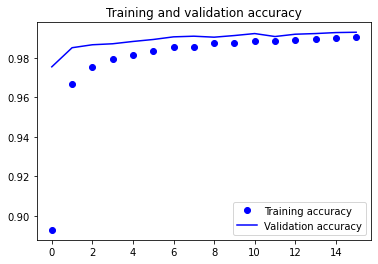

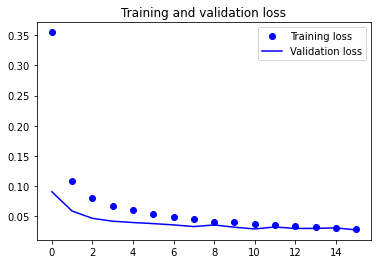

In [49]:
print(history.history.keys())
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(list(range(epochs)), train_accuracy,'bo', label='Training accuracy')
plt.plot(list(range(epochs)), val_accuracy, 'b' ,label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


plt.figure()
plt.plot(list(range(epochs)), train_loss,'bo',label='Training loss')
plt.plot(list(range(epochs)), val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Evaluate performance on Test Set

In [50]:
score = model.evaluate(x_test, y_test, verbose=0)
print("TEST loss:", score[0])
print("Test accuracy", score[1])

TEST loss: 0.02275770530104637
Test accuracy 0.9917000532150269


# Sample prediction

Image shape: (28, 28, 1)
True Image Label Array: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 
True Image Label Shape; (10,) 
True Image Label: 7


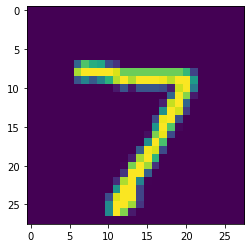

Predicted Image Label Array: ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 7


2022-05-26 22:23:17.300851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [51]:
img_id = 0

sample_test_image = x_test[img_id]
sample_test_label = y_test[img_id]

print('Image shape:', sample_test_image.shape)
print('True Image Label Array:', sample_test_label,
      '\nTrue Image Label Shape;', sample_test_label.shape,
      '\nTrue Image Label:', np.argmax(sample_test_label))
plt.imshow(sample_test_image.reshape(28,28), interpolation='nearest')
plt.show()

prediction = model.predict(sample_test_image.reshape(1,28,28,1))

print('Predicted Image Label Array:', ['{0:0.2f}'.format(i) for i in prediction[0]],
      '\nPredicted Image Label Shape:', prediction.shape,
      '\nPredicted Image Label:', np.argmax(prediction))